<a href="https://colab.research.google.com/github/ChinhQuach303/CONV2D_Project/blob/main/NamingGame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import random
import string
import matplotlib.pyplot as plt

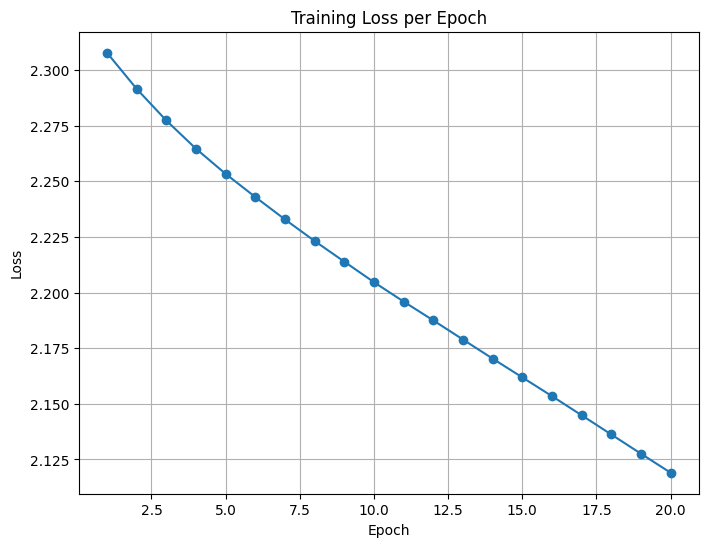

In [8]:

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Hàm định nghĩa mạng fully connected
class FullyConnectedNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FullyConnectedNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # Hidden layer
        self.relu = nn.ReLU()                         # Activation
        self.fc2 = nn.Linear(hidden_size, output_size) # Output layer

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Hàm huấn luyện và vẽ biểu đồ
def train_and_plot(input_size, hidden_size, output_size, epochs=20, learning_rate=0.001):
    # Khởi tạo mạng
    model = FullyConnectedNet(input_size, hidden_size, output_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Dữ liệu giả lập
    X_train = torch.rand(64, input_size)  # Batch size = 64
    y_train = torch.randint(0, output_size, (64,))  # Nhãn giả lập

    # Lưu loss để vẽ biểu đồ
    losses = []

    # Vòng lặp huấn luyện
    for epoch in range(epochs):
        # Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, y_train)

        # Backward pass và cập nhật trọng số
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Ghi lại loss
        losses.append(loss.item())

    # Vẽ biểu đồ loss
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, epochs + 1), losses, marker='o')
    plt.title("Training Loss per Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()

# Gọi hàm với tham số mong muốn
train_and_plot(input_size=100, hidden_size=50, output_size=10)

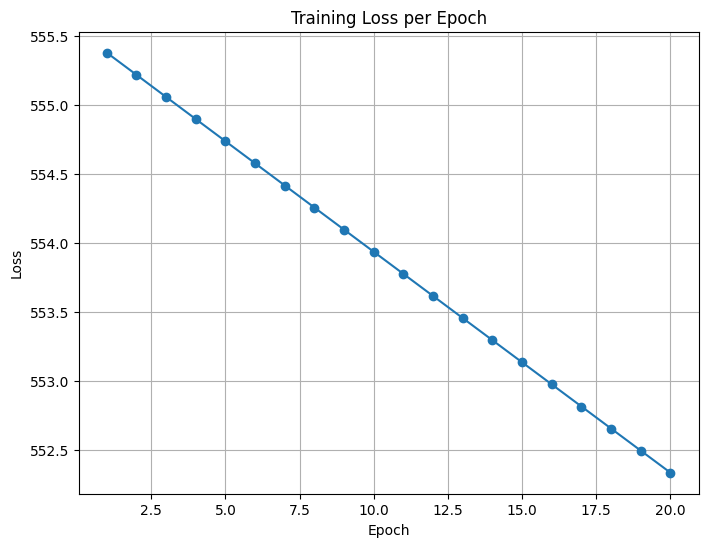

In [12]:

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

class SimpleLatticeNetwork(nn.Module):
    def __init__(self, num_nodes, neighborhood_size):
        super(SimpleLatticeNetwork, self).__init__()
        self.num_nodes = num_nodes
        self.neighborhood_size = neighborhood_size
        self.weights = nn.Parameter(torch.rand(num_nodes, 2 * neighborhood_size + 1))  # Trọng số cho hàng xóm
        self.bias = nn.Parameter(torch.zeros(num_nodes))  # Bias cho mỗi node

    def forward(self, x):
        outputs = []
        for i in range(self.num_nodes):
            start_idx = max(0, i - self.neighborhood_size)
            end_idx = min(self.num_nodes, i + self.neighborhood_size + 1)
            neighbors = x[:, start_idx:end_idx]

            padding_left = max(0, self.neighborhood_size - i)
            padding_right = max(0, (i + self.neighborhood_size + 1) - self.num_nodes)
            neighbors = torch.cat([torch.zeros(x.size(0), padding_left), neighbors, torch.zeros(x.size(0), padding_right)], dim=1)

            # Tính toán output
            output = torch.sum(neighbors * self.weights[i], dim=1) + self.bias[i]
            outputs.append(output.unsqueeze(1))
        return torch.cat(outputs, dim=1)

# Hàm huấn luyện và vẽ biểu đồ
def train_and_plot_lattice(num_nodes, neighborhood_size, epochs=20, learning_rate=0.001):

    model = SimpleLatticeNetwork(num_nodes=num_nodes, neighborhood_size=neighborhood_size)
    criterion = nn.MSELoss()  # Loss cho regression
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    X_train = torch.rand(64, num_nodes)  # Batch size = 64
    y_train = torch.sum(X_train, dim=1, keepdim=True)  # Output giả định là tổng các giá trị đầu vào

    losses = []
    for epoch in range(epochs):
        # Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    # Vẽ biểu đồ loss
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, epochs + 1), losses, marker='o')
    plt.title("Training Loss per Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()

# Gọi hàm
train_and_plot_lattice(num_nodes=50, neighborhood_size=2)

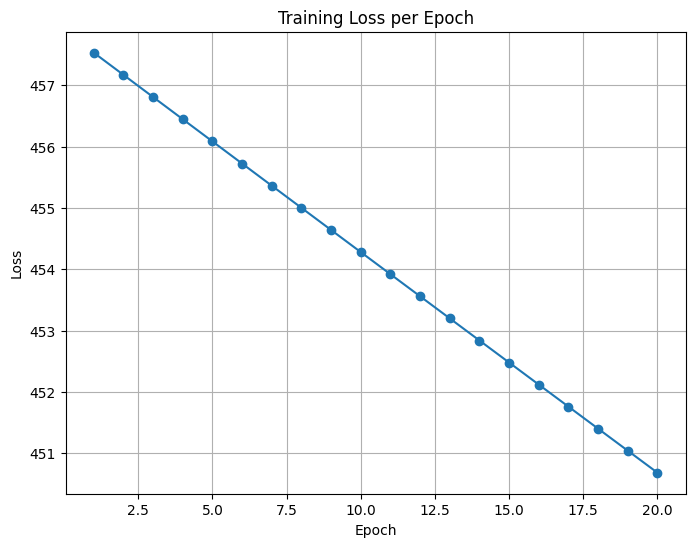

In [13]:

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import random

# Mạng Lattice nhưng thêm 10 node ngẫu nhiên
class RandomLatticeNetwork(nn.Module):
    def __init__(self, num_nodes, neighborhood_size, random_connections=10):
        super(RandomLatticeNetwork, self).__init__()
        self.num_nodes = num_nodes
        self.neighborhood_size = neighborhood_size
        self.random_connections = random_connections

        self.weights = nn.Parameter(torch.rand(num_nodes, 2 * neighborhood_size + 1))
        self.bias = nn.Parameter(torch.zeros(num_nodes))

        self.random_weights = nn.Parameter(torch.rand(num_nodes, random_connections))
        self.random_indices = self.generate_random_connections()

    def generate_random_connections(self):
        random_indices = []
        for i in range(self.num_nodes):
            connections = random.sample(range(self.num_nodes), self.random_connections)
            random_indices.append(connections)
        return random_indices

    def forward(self, x):
        outputs = []
        for i in range(self.num_nodes):
            start_idx = max(0, i - self.neighborhood_size)
            end_idx = min(self.num_nodes, i + self.neighborhood_size + 1)
            neighbors = x[:, start_idx:end_idx]

            padding_left = max(0, self.neighborhood_size - i)
            padding_right = max(0, (i + self.neighborhood_size + 1) - self.num_nodes)
            neighbors = torch.cat([torch.zeros(x.size(0), padding_left), neighbors, torch.zeros(x.size(0), padding_right)], dim=1)

            random_nodes = torch.stack([x[:, idx] for idx in self.random_indices[i]], dim=1)

            lattice_output = torch.sum(neighbors * self.weights[i], dim=1)
            random_output = torch.sum(random_nodes * self.random_weights[i], dim=1)
            output = lattice_output + random_output + self.bias[i]
            outputs.append(output.unsqueeze(1))
        return torch.cat(outputs, dim=1)

# Hàm huấn luyện
def train_and_plot_random_lattice(num_nodes, neighborhood_size, random_connections, epochs=20, learning_rate=0.001):
    # Khởi tạo mạng
    model = RandomLatticeNetwork(num_nodes=num_nodes, neighborhood_size=neighborhood_size, random_connections=random_connections)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Dữ liệu giả lập
    X_train = torch.rand(64, num_nodes)  # Batch size = 64
    y_train = torch.sum(X_train, dim=1, keepdim=True)
    losses = []

    for epoch in range(epochs):
        outputs = model(X_train)
        loss = criterion(outputs, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

    # Vẽ biều đồ
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, epochs + 1), losses, marker='o')
    plt.title("Training Loss per Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()

# Gọi hàm
train_and_plot_random_lattice(num_nodes=50, neighborhood_size=2, random_connections=10)

Running simulation 1...
Simulation completed in 14068 steps.


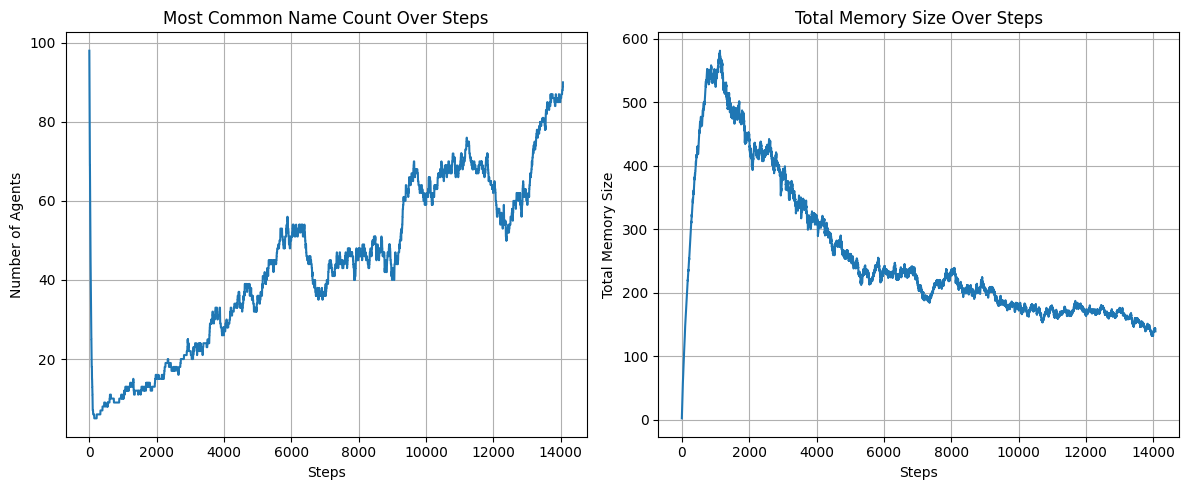

Running simulation 2...
Simulation completed in 11725 steps.


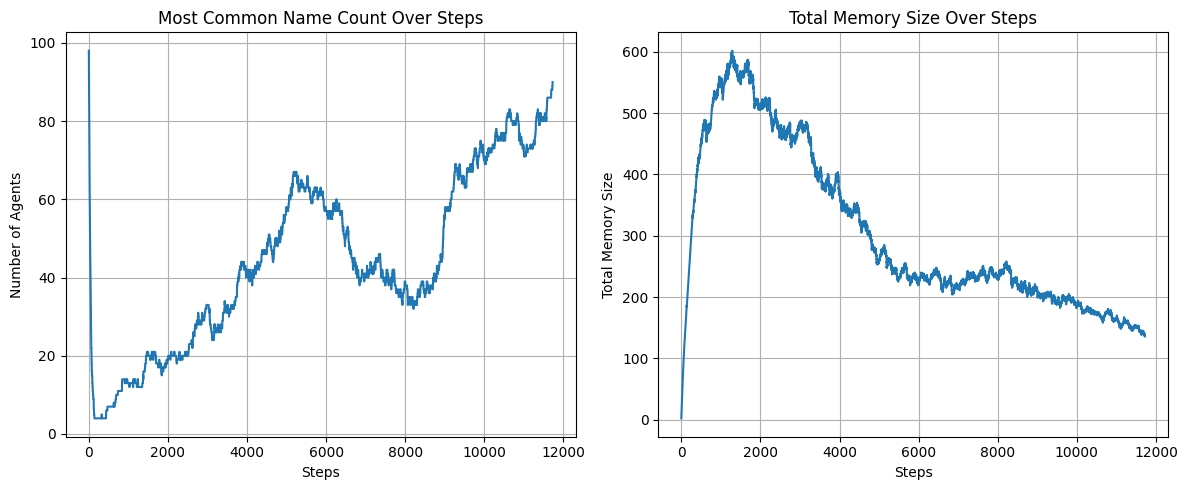

Running simulation 3...
Simulation completed in 13724 steps.


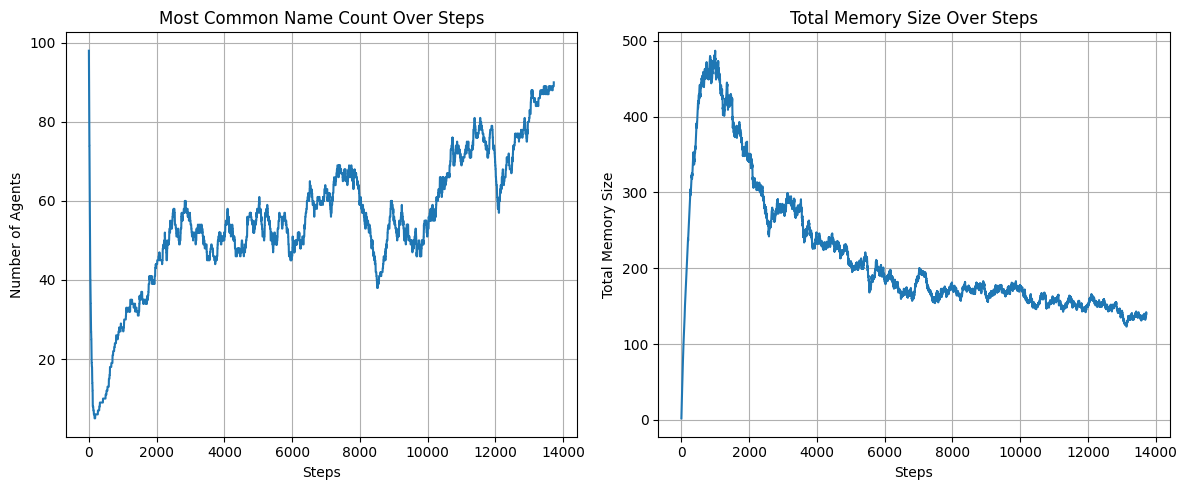

Running simulation 4...
Simulation completed in 23485 steps.


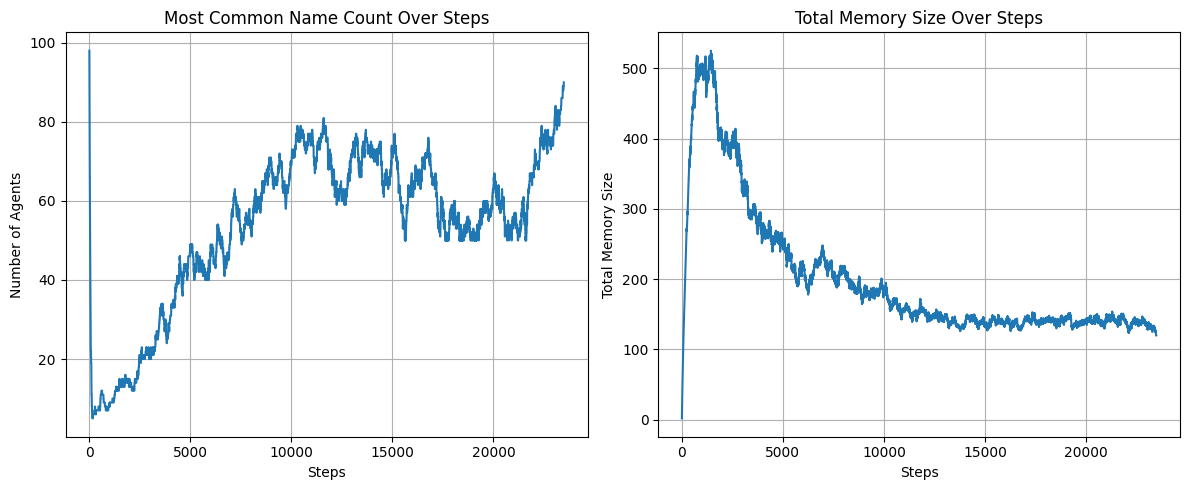

Running simulation 5...
Simulation completed in 18296 steps.


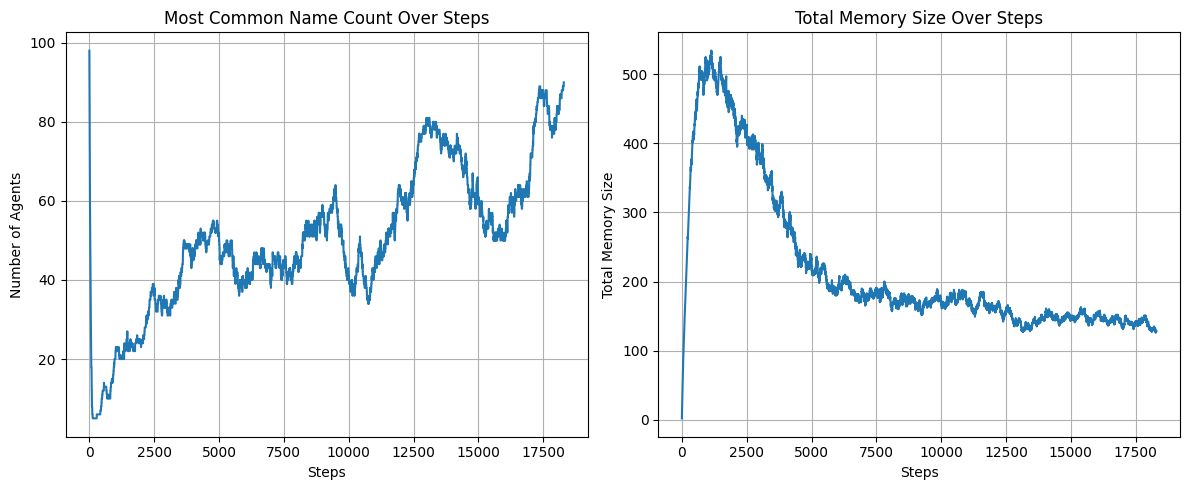

In [14]:

import random
import matplotlib.pyplot as plt
from collections import Counter, defaultdict

# Define Agent
class Agent:
    def __init__(self):
        self.memory = []

    def add_name(self, name):
        if len(self.memory) < 10 and name not in self.memory:
            self.memory.append(name)

    def forget_and_add_name(self, name):
        if name not in self.memory:
            if len(self.memory) == 10:
                self.memory.pop(0)  # Forget the oldest name
            self.memory.append(name)


# Naming Game Simulation
class NamingGame:
    def __init__(self, num_agents, max_steps=1_000_000):
        self.num_agents = num_agents
        self.agents = [Agent() for _ in range(num_agents)]
        self.name_set = set()
        self.max_steps = max_steps
        self.step = 0
        self.most_common_name = None
        self.most_common_name_counts = []
        self.total_memory_sizes = []

    def generate_new_name(self):
        """Generate a unique name."""
        while True:
            name = f"Name{random.randint(1, 10_000_000)}"
            if name not in self.name_set:
                self.name_set.add(name)
                return name

    def interaction(self):
        """One interaction between a speaker and a hearer."""
        # Choose two random agents
        speaker, hearer = random.sample(self.agents, 2)

        # Speaker creates a new name if their memory is empty
        if not speaker.memory:
            new_name = self.generate_new_name()
            speaker.add_name(new_name)

        # Speaker chooses a name from its memory
        spoken_name = random.choice(speaker.memory)

        # Update hearer's memory
        if spoken_name in hearer.memory:
            # If hearer knows the name, update speaker to only keep the name
            speaker.memory = [spoken_name]
        else:
            # If hearer doesn't know the name, learn it
            hearer.forget_and_add_name(spoken_name)

    def record_statistics(self):
        """Record statistics for plotting."""
        # Find the most common name in the first memory slots
        first_memory_names = [agent.memory[0] if agent.memory else None for agent in self.agents]
        name_counts = Counter(first_memory_names)
        self.most_common_name, count = name_counts.most_common(1)[0] if first_memory_names else (None, 0)
        self.most_common_name_counts.append(count)

        # Record total memory size
        total_memory_size = sum(len(agent.memory) for agent in self.agents)
        self.total_memory_sizes.append(total_memory_size)

    def has_consensus(self):
        """Check if 90% consensus has been reached."""
        if not self.most_common_name:
            return False
        return self.most_common_name_counts[-1] >= 0.9 * self.num_agents

    def run(self):
        """Run the simulation."""
        while self.step < self.max_steps:
            self.step += 1
            self.interaction()
            self.record_statistics()

            # Stop if consensus is reached
            if self.has_consensus():
                break

        print(f"Simulation completed in {self.step} steps.")
        return self.most_common_name_counts, self.total_memory_sizes


# Plotting Function
def plot_results(steps, most_common_counts, total_memory_sizes):
    # Plot most common name counts
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(steps), most_common_counts, label="Agents with most common name")
    plt.xlabel("Steps")
    plt.ylabel("Number of Agents")
    plt.title("Most Common Name Count Over Steps")
    plt.grid()

    # Plot total memory sizes
    plt.subplot(1, 2, 2)
    plt.plot(range(steps), total_memory_sizes, label="Total Memory Size")
    plt.xlabel("Steps")
    plt.ylabel("Total Memory Size")
    plt.title("Total Memory Size Over Steps")
    plt.grid()

    plt.tight_layout()
    plt.show()


# Run Simulation
num_agents = 100  # Number of agents in the network
max_steps = 1_000_000
simulations = []

for i in range(5):  # Run 5 simulations
    print(f"Running simulation {i + 1}...")
    game = NamingGame(num_agents, max_steps)
    most_common_counts, total_memory_sizes = game.run()
    simulations.append((most_common_counts, total_memory_sizes))

    # Plot results for each simulation
    plot_results(len(most_common_counts), most_common_counts, total_memory_sizes)